In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import random
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

data = pd.read_csv('/content/dataset.csv',encoding='utf-8')
data_cols=['전용면적','층','거래일자','거래금액']
data = pd.DataFrame(data[data_cols])
data.head()



,전용면적,층,거래일자,거래금액
0,68.14,7,20100101,11600
1,84.75,1,20100102,12000
2,84.87,1,20100103,13800
3,116.81,19,20100104,16700
4,84.92,4,20100104,18500


In [ ]:
data['거래일자'] = data['거래일자'].astype(str)
ts_dates= pd.to_datetime(data['거래일자'])
for i in range(len(data['거래일자'])):
  data['거래일자'][i]= str(pd.Period(ts_dates[i],freq='M'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data

,전용면적,층,거래일자,거래금액
0,68.1400,7,2010-01,11600
1,84.7500,1,2010-01,12000
2,84.8700,1,2010-01,13800
3,116.8100,19,2010-01,16700
4,84.9200,4,2010-01,18500
...,...,...,...,...
47197,59.8000,11,2022-10,20000
47198,19.8197,16,2022-10,14000
47199,130.6500,17,2022-10,27000
47200,59.9574,28,2022-10,49700


In [ ]:
mean_month1=data.groupby("거래일자")['거래금액'].mean() # 월별 평균값a=
b=list(set(data['거래일자']))
b.sort()

a= { 'ds':b , 'y' : mean_month['거래금액']}
df = pd.DataFrame(a)
df



,ds,y
거래일자,,
2010-01,2010-01,19286.266402
2010-02,2010-02,18064.901316
2010-03,2010-03,18022.259450
2010-04,2010-04,19858.710000
2010-05,2010-05,16744.204420
...,...,...
2022-06,2022-06,34767.280000
2022-07,2022-07,31192.216867
2022-08,2022-08,40497.964286


In [ ]:
median_month=data.groupby("거래일자")['거래금액'].median() # 중앙값
median_month

거래일자
2010-01     16100.0
2010-02     15000.0
2010-03     15100.0
2010-04     17200.0
2010-05     13550.0
             ...   
2022-07     21700.0
2022-08     25750.0
2022-09     31220.0
2022-10     49350.0
20221008    24550.0
Name: 거래금액, Length: 155, dtype: float64

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()



m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcyqswpy/9_m14gz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcyqswpy/33p3llse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44455', 'data', 'file=/tmp/tmpwcyqswpy/9_m14gz6.json', 'init=/tmp/tmpwcyqswpy/33p3llse.json', 'output', 'file=/tmp/tmpwcyqswpy/prophet_model0puzo71_/prophet_model-20221102192220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=1000)
future


,ds
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
1149,2025-06-23
1150,2025-06-24
1151,2025-06-25
1152,2025-06-26


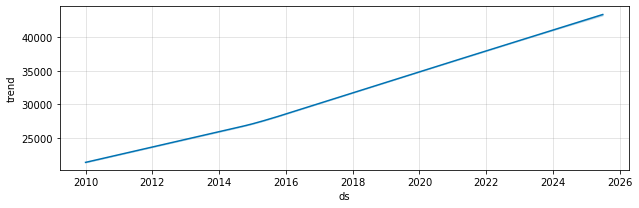

In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
fig = m.plot_components(forecast)